In [13]:
import sys
sys.path.append("../../../ns3_sem")
import sem
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
import numpy as np

# RngRun 1

In [14]:
campaign_dir = 'rngrun1/rngrun1'
campaign = sem.CampaignManager.load(campaign_dir, check_repo=False)

In [15]:
param_combination = {'simTime':1000, 
                     'nBlocks': 4, #list([1,2,3,4,5,6,7,8,9,10]),#round(4*nBlocks*0.1)
                     'nMacroEnbSites': 1, #list([1,2,3,4,5,6,7,8,9,10]),
                     'nMacroEnbSitesX': 1,
                     'macroUeDensity': 0.00001,#1000000 [p * 0.5 for p in range(0.0001, 0.01)]
                     'homeEnbDeploymentRatio': 1.0,
                     'homeEnbActivationRatio': 1.0,
                     'homeUesHomeEnbRatio': 1.0,
                     'outdoorUeMinSpeed': 5.0,#[j * 2.0 for j in range(2.0, 10.0)]
                     'outdoorUeMaxSpeed': 5.0,
                     'handoverAlgorithm': 'A3',
                     'Hysteresis': [j * 1.0 for j in np.arange(0.0, 3.2, 0.2)],
                     'TimeToTrigger':  list([0.0, 40.0, 64.0, 80.0, 100.0, 128.0, 160.0, 256.0, 320.0, 480.0, 512.0]),
                     'SrsPeriodicity': 80,
                     'generateRem': 0,
                     'RngRun': [1]
                    }

In [16]:
def get_average_throughput(results_rngrun1):
    if results_rngrun1['output']['stderr'] != "":
        num_HOs = -1
        num_RLFs = -1
        num_HFMRs = -1
        num_HFNPs = -1
        num_HFJs = -1
        num_HFLs = -1
    else:
        split_results_rngrun1 = results_rngrun1['output']['stdout'].split("\n")
        num_HOs = 0
        num_RLFs = 0
        num_HFMRs = 0
        num_HFNPs = 0
        num_HFJs = 0
        num_HFLs = 0
        for line in split_results_rngrun1:
            event = line.split(":",1)[0]
            if event == "Handover_start":
                num_HOs += 1
            elif event == "Handover_Failure_NoPreamble":
                num_HFNPs += 1
            elif event == "Handover_Failure_JoiningTimeout":
                num_HFJs += 1
            elif event == "Handover_Failure_MaxRach":
                num_HFMRs += 1
            elif event == "Handover_Failure_LeavingTimeout":
                num_HFLs += 1
            elif event == "Radio_link_failure_detected":
                num_RLFs += 1
    return [num_HOs, num_RLFs, num_HFNPs, num_HFJs, num_HFMRs, num_HFLs]

# the result of generate dataframe
results_rngrun1 = campaign.get_results_as_dataframe(get_average_throughput, 
                                            ['num_HOs', 'num_RLFs','num_HFNPs','num_HFJs','num_HFMRs','num_HFLs'], 
                                            params = param_combination, drop_constant_columns=True)
print(results_rngrun1)

     Hysteresis  TimeToTrigger  num_HFJs
0           0.0            0.0        10
1           0.0           40.0        10
2           0.0           64.0        10
3           0.0           80.0        10
4           0.0          100.0        10
..          ...            ...       ...
171         3.0          160.0        11
172         3.0          256.0        11
173         3.0          320.0        11
174         3.0          480.0        11
175         3.0          512.0        11

[176 rows x 3 columns]


# RngRun 2

In [18]:
campaign_dir = 'rngrun2/rngrun2'
campaign = sem.CampaignManager.load(campaign_dir, check_repo=False)

In [19]:
param_combination = {'simTime':1000, 
                     'nBlocks': 4, #list([1,2,3,4,5,6,7,8,9,10]),#round(4*nBlocks*0.1)
                     'nMacroEnbSites': 1, #list([1,2,3,4,5,6,7,8,9,10]),
                     'nMacroEnbSitesX': 1,
                     'macroUeDensity': 0.00001,#1000000 [p * 0.5 for p in range(0.0001, 0.01)]
                     'homeEnbDeploymentRatio': 1.0,
                     'homeEnbActivationRatio': 1.0,
                     'homeUesHomeEnbRatio': 1.0,
                     'outdoorUeMinSpeed': 5.0,#[j * 2.0 for j in range(2.0, 10.0)]
                     'outdoorUeMaxSpeed': 5.0,
                     'handoverAlgorithm': 'A3',
                     'Hysteresis': [j * 1.0 for j in np.arange(0.0, 3.2, 0.2)],
                     'TimeToTrigger':  list([0.0, 40.0, 64.0, 80.0, 100.0, 128.0, 160.0, 256.0, 320.0, 480.0, 512.0]),
                     'SrsPeriodicity': 80,
                     'generateRem': 0,
                     'RngRun': [2]
                    }

In [20]:
def get_average_throughput(results_rngrun2):
    if results_rngrun2['output']['stderr'] != "":
        num_HOs = -1
        num_RLFs = -1
        num_HFMRs = -1
        num_HFNPs = -1
        num_HFJs = -1
        num_HFLs = -1
    else:
        split_results_rngrun2 = results_rngrun2['output']['stdout'].split("\n")
        num_HOs = 0
        num_RLFs = 0
        num_HFMRs = 0
        num_HFNPs = 0
        num_HFJs = 0
        num_HFLs = 0
        for line in split_results_rngrun2:
            event = line.split(":",1)[0]
            if event == "Handover_start":
                num_HOs += 1
            elif event == "Handover_Failure_NoPreamble":
                num_HFNPs += 1
            elif event == "Handover_Failure_JoiningTimeout":
                num_HFJs += 1
            elif event == "Handover_Failure_MaxRach":
                num_HFMRs += 1
            elif event == "Handover_Failure_LeavingTimeout":
                num_HFLs += 1
            elif event == "Radio_link_failure_detected":
                num_RLFs += 1
    return [num_HOs, num_RLFs, num_HFNPs, num_HFJs, num_HFMRs, num_HFLs]

# the result of generate dataframe
results_rngrun2 = campaign.get_results_as_dataframe(get_average_throughput, 
                                            ['num_HOs', 'num_RLFs','num_HFNPs','num_HFJs','num_HFMRs','num_HFLs'], 
                                            params = param_combination, drop_constant_columns=True)
print(results_rngrun2)

     Hysteresis  TimeToTrigger  num_HOs  num_RLFs  num_HFJs
0           0.0            0.0        8         4         4
1           0.0           40.0        8         4         4
2           0.0           64.0        8         5         3
3           0.0           80.0        8         4         4
4           0.0          100.0        8         5         3
..          ...            ...      ...       ...       ...
171         3.0          160.0        4         3         3
172         3.0          256.0        4         3         3
173         3.0          320.0        4         3         3
174         3.0          480.0        4         4         3
175         3.0          512.0        4         4         3

[176 rows x 5 columns]


# RngRun 3

In [21]:
campaign_dir = 'rngrun3/rngrun3'
campaign = sem.CampaignManager.load(campaign_dir, check_repo=False)

In [22]:
param_combination = {'simTime':1000, 
                     'nBlocks': 4, #list([1,2,3,4,5,6,7,8,9,10]),#round(4*nBlocks*0.1)
                     'nMacroEnbSites': 1, #list([1,2,3,4,5,6,7,8,9,10]),
                     'nMacroEnbSitesX': 1,
                     'macroUeDensity': 0.00001,#1000000 [p * 0.5 for p in range(0.0001, 0.01)]
                     'homeEnbDeploymentRatio': 1.0,
                     'homeEnbActivationRatio': 1.0,
                     'homeUesHomeEnbRatio': 1.0,
                     'outdoorUeMinSpeed': 5.0,#[j * 2.0 for j in range(2.0, 10.0)]
                     'outdoorUeMaxSpeed': 5.0,
                     'handoverAlgorithm': 'A3',
                     'Hysteresis': [j * 1.0 for j in np.arange(0.0, 3.2, 0.2)],
                     'TimeToTrigger':  list([0.0, 40.0, 64.0, 80.0, 100.0, 128.0, 160.0, 256.0, 320.0, 480.0, 512.0]),
                     'SrsPeriodicity': 80,
                     'generateRem': 0,
                     'RngRun': [3]
                    }

In [23]:
def get_average_throughput(results_rngrun3):
    if results_rngrun3['output']['stderr'] != "":
        num_HOs = -1
        num_RLFs = -1
        num_HFMRs = -1
        num_HFNPs = -1
        num_HFJs = -1
        num_HFLs = -1
    else:
        split_results_rngrun3 = results_rngrun3['output']['stdout'].split("\n")
        num_HOs = 0
        num_RLFs = 0
        num_HFMRs = 0
        num_HFNPs = 0
        num_HFJs = 0
        num_HFLs = 0
        for line in split_results_rngrun3:
            event = line.split(":",1)[0]
            if event == "Handover_start":
                num_HOs += 1
            elif event == "Handover_Failure_NoPreamble":
                num_HFNPs += 1
            elif event == "Handover_Failure_JoiningTimeout":
                num_HFJs += 1
            elif event == "Handover_Failure_MaxRach":
                num_HFMRs += 1
            elif event == "Handover_Failure_LeavingTimeout":
                num_HFLs += 1
            elif event == "Radio_link_failure_detected":
                num_RLFs += 1
    return [num_HOs, num_RLFs, num_HFNPs, num_HFJs, num_HFMRs, num_HFLs]

# the result of generate dataframe
results_rngrun3 = campaign.get_results_as_dataframe(get_average_throughput, 
                                            ['num_HOs', 'num_RLFs','num_HFNPs','num_HFJs','num_HFMRs','num_HFLs'], 
                                            params = param_combination, drop_constant_columns=True)
print(results_rngrun3)

     Hysteresis  TimeToTrigger  num_HOs  num_RLFs  num_HFJs
0           0.0            0.0       22         7         9
1           0.0           40.0       22         7         9
2           0.0           64.0       22         7         9
3           0.0           80.0       22         7         9
4           0.0          100.0       22         8         8
..          ...            ...      ...       ...       ...
171         3.0          160.0       18         7        11
172         3.0          256.0       18         8        11
173         3.0          320.0       18         7        14
174         3.0          480.0       18         8        15
175         3.0          512.0       18         8        15

[176 rows x 5 columns]


# RngRun 4

In [25]:
campaign_dir = 'rngrun4/rngrun4'
campaign = sem.CampaignManager.load(campaign_dir, check_repo=False)

In [26]:
param_combination = {'simTime':1000, 
                     'nBlocks': 4, #list([1,2,3,4,5,6,7,8,9,10]),#round(4*nBlocks*0.1)
                     'nMacroEnbSites': 1, #list([1,2,3,4,5,6,7,8,9,10]),
                     'nMacroEnbSitesX': 1,
                     'macroUeDensity': 0.00001,#1000000 [p * 0.5 for p in range(0.0001, 0.01)]
                     'homeEnbDeploymentRatio': 1.0,
                     'homeEnbActivationRatio': 1.0,
                     'homeUesHomeEnbRatio': 1.0,
                     'outdoorUeMinSpeed': 5.0,#[j * 2.0 for j in range(2.0, 10.0)]
                     'outdoorUeMaxSpeed': 5.0,
                     'handoverAlgorithm': 'A3',
                     'Hysteresis': [j * 1.0 for j in np.arange(0.0, 3.2, 0.2)],
                     'TimeToTrigger':  list([0.0, 40.0, 64.0, 80.0, 100.0, 128.0, 160.0, 256.0, 320.0, 480.0, 512.0]),
                     'SrsPeriodicity': 80,
                     'generateRem': 0,
                     'RngRun': [4]
                    }

In [27]:
def get_average_throughput(results_rngrun4):
    if results_rngrun4['output']['stderr'] != "":
        num_HOs = -1
        num_RLFs = -1
        num_HFMRs = -1
        num_HFNPs = -1
        num_HFJs = -1
        num_HFLs = -1
    else:
        split_results_rngrun4 = results_rngrun4['output']['stdout'].split("\n")
        num_HOs = 0
        num_RLFs = 0
        num_HFMRs = 0
        num_HFNPs = 0
        num_HFJs = 0
        num_HFLs = 0
        for line in split_results_rngrun4:
            event = line.split(":",1)[0]
            if event == "Handover_start":
                num_HOs += 1
            elif event == "Handover_Failure_NoPreamble":
                num_HFNPs += 1
            elif event == "Handover_Failure_JoiningTimeout":
                num_HFJs += 1
            elif event == "Handover_Failure_MaxRach":
                num_HFMRs += 1
            elif event == "Handover_Failure_LeavingTimeout":
                num_HFLs += 1
            elif event == "Radio_link_failure_detected":
                num_RLFs += 1
    return [num_HOs, num_RLFs, num_HFNPs, num_HFJs, num_HFMRs, num_HFLs]

# the result of generate dataframe
results_rngrun4 = campaign.get_results_as_dataframe(get_average_throughput, 
                                            ['num_HOs', 'num_RLFs','num_HFNPs','num_HFJs','num_HFMRs','num_HFLs'], 
                                            params = param_combination, drop_constant_columns=True)
print(results_rngrun4)

     Hysteresis  TimeToTrigger  num_HOs  num_RLFs  num_HFJs
0           0.0            0.0       11         9         9
1           0.0           40.0       11         9         9
2           0.0           64.0       11         9         9
3           0.0           80.0       11         9         9
4           0.0          100.0       11         9         9
..          ...            ...      ...       ...       ...
171         3.0          160.0        8        10         6
172         3.0          256.0        7        10         6
173         3.0          320.0        7        10         7
174         3.0          480.0        7        10         7
175         3.0          512.0        7        10         7

[176 rows x 5 columns]


# RngRun 5

In [28]:
campaign_dir = 'rngrun5/rngrun5'
campaign = sem.CampaignManager.load(campaign_dir, check_repo=False)

In [29]:
param_combination = {'simTime':1000, 
                     'nBlocks': 4, #list([1,2,3,4,5,6,7,8,9,10]),#round(4*nBlocks*0.1)
                     'nMacroEnbSites': 1, #list([1,2,3,4,5,6,7,8,9,10]),
                     'nMacroEnbSitesX': 1,
                     'macroUeDensity': 0.00001,#1000000 [p * 0.5 for p in range(0.0001, 0.01)]
                     'homeEnbDeploymentRatio': 1.0,
                     'homeEnbActivationRatio': 1.0,
                     'homeUesHomeEnbRatio': 1.0,
                     'outdoorUeMinSpeed': 5.0,#[j * 2.0 for j in range(2.0, 10.0)]
                     'outdoorUeMaxSpeed': 5.0,
                     'handoverAlgorithm': 'A3',
                     'Hysteresis': [j * 1.0 for j in np.arange(0.0, 3.2, 0.2)],
                     'TimeToTrigger':  list([0.0, 40.0, 64.0, 80.0, 100.0, 128.0, 160.0, 256.0, 320.0, 480.0, 512.0]),
                     'SrsPeriodicity': 80,
                     'generateRem': 0,
                     'RngRun': [5]
                    }

In [30]:
def get_average_throughput(results_rngrun5):
    if results_rngrun5['output']['stderr'] != "":
        num_HOs = -1
        num_RLFs = -1
        num_HFMRs = -1
        num_HFNPs = -1
        num_HFJs = -1
        num_HFLs = -1
    else:
        split_results_rngrun5 = results_rngrun5['output']['stdout'].split("\n")
        num_HOs = 0
        num_RLFs = 0
        num_HFMRs = 0
        num_HFNPs = 0
        num_HFJs = 0
        num_HFLs = 0
        for line in split_results_rngrun5:
            event = line.split(":",1)[0]
            if event == "Handover_start":
                num_HOs += 1
            elif event == "Handover_Failure_NoPreamble":
                num_HFNPs += 1
            elif event == "Handover_Failure_JoiningTimeout":
                num_HFJs += 1
            elif event == "Handover_Failure_MaxRach":
                num_HFMRs += 1
            elif event == "Handover_Failure_LeavingTimeout":
                num_HFLs += 1
            elif event == "Radio_link_failure_detected":
                num_RLFs += 1
    return [num_HOs, num_RLFs, num_HFNPs, num_HFJs, num_HFMRs, num_HFLs]

# the result of generate dataframe
results_rngrun5 = campaign.get_results_as_dataframe(get_average_throughput, 
                                            ['num_HOs', 'num_RLFs','num_HFNPs','num_HFJs','num_HFMRs','num_HFLs'], 
                                            params = param_combination, drop_constant_columns=True)
print(results_rngrun5)

     Hysteresis  TimeToTrigger  num_HOs  num_RLFs  num_HFJs
0           0.0            0.0       33         9        13
1           0.0           40.0       33         9        13
2           0.0           64.0       33         9        13
3           0.0           80.0       33         9        13
4           0.0          100.0       33         9        13
..          ...            ...      ...       ...       ...
171         3.0          160.0       27         9        26
172         3.0          256.0       27         9        26
173         3.0          320.0       27         9        27
174         3.0          480.0       26        10        26
175         3.0          512.0       26        10        26

[176 rows x 5 columns]


In [34]:
import pandas as pd
df_a = pd.DataFrame(
    {
        'aaa':[1,2,3],
        'bbb':[100,200,300]
    }
)
df_b = pd.DataFrame(
    {
        'aaa':[4,5,6],
        'bbb':[400,500,600]
    }
)
df_a


,aaa,bbb
0,1,100
1,2,200
2,3,300


# Mean

In [41]:
results_rngrun_ave =  (results_rngrun2 + results_rngrun3 + results_rngrun4 + results_rngrun5)/4
results_rngrun_ave

,Hysteresis,TimeToTrigger,num_HOs,num_RLFs,num_HFJs
0,0.0,0.0,18.50,7.25,8.75
1,0.0,40.0,18.50,7.25,8.75
2,0.0,64.0,18.50,7.50,8.50
3,0.0,80.0,18.50,7.25,8.75
4,0.0,100.0,18.50,7.75,8.25
...,...,...,...,...,...
171,3.0,160.0,14.25,7.25,11.50
172,3.0,256.0,14.00,7.50,11.50
173,3.0,320.0,14.00,7.25,12.75
174,3.0,480.0,13.75,8.00,12.75


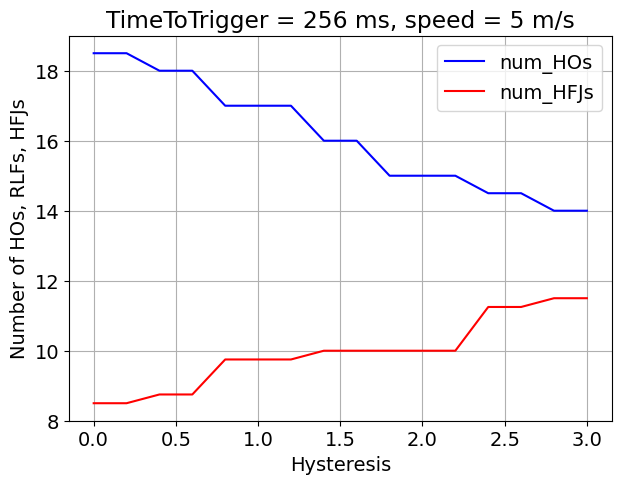

In [61]:
results_Hys = results_rngrun_ave[(results_rngrun_ave['TimeToTrigger'] == 256.0)]
plt.rcParams.update({'font.size':14})
fig = plt.figure(figsize=(7, 5))
ax = plt.axes()
ax.plot(results_Hys['Hysteresis'], results_Hys['num_HOs'], color = 'blue')
ax.plot(results_Hys['Hysteresis'], results_Hys['num_HFJs'], color = 'red')
#ax.plot(results_Hys['Hysteresis'], results_Hys['num_RLFs'], color = 'black')
ax.grid()
ax.set_xlabel('Hysteresis')
ax.set_ylabel('Number of HOs, RLFs, HFJs')
ax.set_title('TimeToTrigger = 256 ms, speed = 5 m/s')
ax.legend(['num_HOs', 'num_HFJs','num_RLFs'])

In [53]:
results_rngrun_ave["HO_fail_pro"] = results_rngrun_ave["num_HFJs"]/results_rngrun_ave["num_HOs"]
print(results_rngrun_ave)

     Hysteresis  TimeToTrigger  num_HOs  num_RLFs  num_HFJs  HO_fail_pro
0           0.0            0.0    18.50      7.25      8.75     0.472973
1           0.0           40.0    18.50      7.25      8.75     0.472973
2           0.0           64.0    18.50      7.50      8.50     0.459459
3           0.0           80.0    18.50      7.25      8.75     0.472973
4           0.0          100.0    18.50      7.75      8.25     0.445946
..          ...            ...      ...       ...       ...          ...
171         3.0          160.0    14.25      7.25     11.50     0.807018
172         3.0          256.0    14.00      7.50     11.50     0.821429
173         3.0          320.0    14.00      7.25     12.75     0.910714
174         3.0          480.0    13.75      8.00     12.75     0.927273
175         3.0          512.0    13.75      8.00     12.75     0.927273

[176 rows x 6 columns]


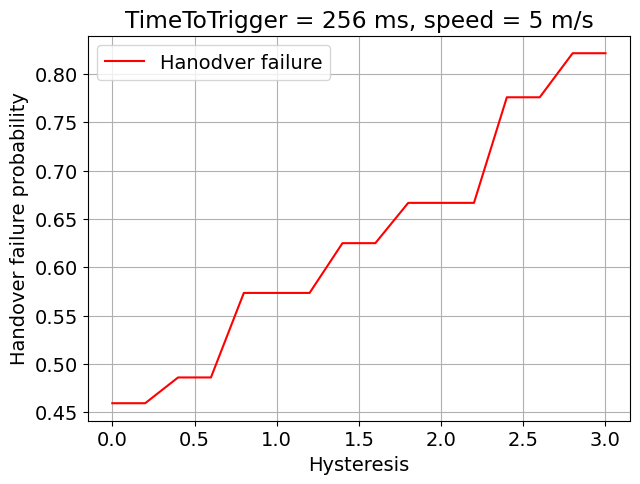

In [60]:
results_Hys_hofail = results_rngrun_ave[(results_rngrun_ave['TimeToTrigger'] == 256.0)]
plt.rcParams.update({'font.size':14})
fig = plt.figure(figsize=(7, 5))
ax = plt.axes()
ax.plot(results_Hys_hofail['Hysteresis'], results_Hys_hofail['HO_fail_pro'], color = 'red')
ax.grid()
ax.set_xlabel('Hysteresis')
ax.set_ylabel('Handover failure probability')
ax.set_title('TimeToTrigger = 256 ms, speed = 5 m/s')
ax.legend(['Hanodver failure'])